# Uke 3: Gj칮r det interaktivt

I denne notatboken vil vi utforske hvordan man kan lage ***interaktive*** datavisualiseringer ved hjelp av Vega-Altair. Vi introduserte f칮rst [Altair](https://altair-viz.github.io/) i [DIGI118 Modul 1: Heisann, Altair!](https://www.kaggle.com/code/lauragarrison/digi118-modul-1-heisann-altair) og introduserte metoder for 친 tilpasse og finjustere visualiseringer i [DIGI118 Modul 2: Det riktige diagrammet for jobben](https://www.kaggle.com/code/amykzhang/digi118-modul-2-det-riktige-diagrammet-for-jobben). 

N칮kkelen til mange gode visualiseringer er brukerens evne til 친 samhandle med den gitte visualiseringen. Altairs h칮yniv친grammatikk gj칮r det enkelt 친 implementere interaktivitet med bare noen f친 kodelinjer. Denne uken skal vi utforske interaktivitet som en mulighet til 친 engasjere seg i dataene v친re. M친let for uken er 친 implementere **Shneidermans mantra** med diagrammene v친re: *Oversikt f칮rst, zoom og filtrer, detaljer p친 foresp칮rsel*. 

I denne modulen vil du l칝re om Altairs interaktivitet ved hjelp av v칝rdatasettene Titanic og Bergen. Deretter vil du bruke disse konseptene til 친 legge til interaktivitet i de to kartene du har laget for DIGI118-oppgaven.
- *Zoom* med `.interactive()`.
- *Filter* med valg og betingelser
- *Detaljer p친 foresp칮rsel* med verkt칮ytips


**La oss komme i gang!**

---

### Lag f칮rst en kopi av denne notatboken ved hjelp av knappen 칮verst til h칮yre i dette vinduet.
N친 er du klar til 친 kode i din egen versjon av denne notatboken.

# 1. Importere og lese data
Som vanlig m친 vi f칮rst importere bibliotekene `pandas` og `altair`:

In [2]:
import pandas as pd
import altair as alt

La oss ogs친 lese inn [Titanic-datasettet](https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates), som vi vil bruke som input i denne notatboken.

In [3]:
titanic = pd.read_csv("titanic_coord.csv")

# 2. Oversikt f칮rst
Vi tenker f칮rst p친 hvilke sp칮rsm친l vi er interessert i 친 utforske i dataene v친re. Deretter kan vi utforme et diagram (ved hjelp av Altair-konseptene vi har l칝rt s친 langt) og legge til interaktivitet som hjelper oss med 친 finne svar p친 det vi lurer p친. 

For eksempel: ***Hvem var passasjerene p친 Titanic?*** Var de yngre eller eldre? Var de menn eller kvinner? Hadde de h칮yere eller lavere sosio칮konomisk status (som vi kan utlede av billettkostnadene)?

La oss begynne med 친 lage en visualisering som kan hjelpe oss med 친 utforske disse sp칮rsm친lene. Dette er **oversiktslaget** i Shneidermans mantra.

In [4]:
# Draw chart
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
)

alt.Chart(...)

Det er vanskelig 친 skille disse datapunktene fra hverandre p친 grunn av overplotting. La oss legge til litt interaktivitet for 친 hjelpe deg med det.

# 3. Zoom...
Det neste laget i Shneidermans mantra er 친 **zoome og filtrere**.

I Altair kan vi zoome og panorere langs et diagram ved 친 legge til metoden `.interactive()` p친 slutten av Chart-objektet v친rt. Med bare 칠n kodelinje kan vi umiddelbart gi diagrammene v친re interaktivitet. S친 flott!

Interaksjon med diagrammet ligner p친 친 bruke et verkt칮y som Google Maps. Pr칮v disse selv:
- For 친 **zoome** kan du bla inn og ut av diagrammet.
- For 친 **panorere**, klikk og dra inne i diagrammet.

In [5]:
# Draw chart with zoom and pan interactivity
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
).interactive()

alt.Chart(...)

---
## 3a. Pr칮v deg selv! 游닇
Lag et diagram etter eget valg ved hjelp av Titanic-datasettet. Gj칮r dette diagrammet interaktivt ved hjelp av `.interactive()`.

In [6]:
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
).interactive()

alt.Chart(...)

---
# 4. ...og filtrer

I Altair kan vi **filtrere** datapunktene i et diagram. Filterinteraksjoner er basert p친 tre kjernekonsepter i Altairs grammatikk for visualisering:
1. **Parametere** er de grunnleggende byggesteinene i interaksjonen som kontrollerer aspekter ved et diagrams utseende eller oppf칮rsel. Dette kan v칝re enkle **variabler** som lagrer verdier du 칮nsker 친 gjenbruke. Eller de kan v칝re komplekse **valg** som gj칮r det mulig for brukeren 친 endre dataene som vises i diagrammet ved hjelp av egne handlinger (f.eks. museklikk).
2. En **betingelse** bestemmer hvordan en parameter p친virker et diagramelement basert p친 en bestemt logikk. Betingelser brukes for eksempel til 친 endre farge eller opasitet basert p친 om datapunktene er valgt eller ikke.
3. **Widgets** er brukergrensesnittelementer (som legender, glidebrytere, rullegardinmenyer eller avkrysningsbokser) som lar brukerne justere parametere ved hjelp av handlinger (f.eks. ved 친 klikke).

I denne modulen viser vi deg to m친ter 친 filtrere data p친: 1) ved 친 klikke p친 en interaktiv tegnforklaring og 2) ved 친 b칮rste over koblede diagrammer. Det finnes mange andre m친ter som vi ikke tar for oss her, men som er tilgjengelige i [Altair-dokumentasjon](https://altair-viz.github.io/user_guide/interactions.html).

## 4a. Interaktiv tegnforklaring

Med en interaktiv tegnforklaring kan brukerne filtrere data i diagrammet ved 친 klikke p친 kategorier i tegnforklaringen. 

### Hvordan klikker vi p친 kategorier i en tegnforklaring?
Det f칮rste trinnet er 친 opprette en **valgparameter** som gj칮r det mulig 친 klikke p친 tegnforklaringen. En type utvelgelse, punktutvelgelse eller `selection_point()`, gj칮r det mulig for brukere 친 velge diagramelementer ett om gangen ved hjelp av musebevegelser, for eksempel ved 친 klikke eller holde musepekeren. Som standard velger `selection_point()` ting ved 친 klikke. 

Vi kan imidlertid gj칮re valget mer spesifikt ved 친 legge til argumenter innenfor parentesen.
- **M친l for valg:** For alle andre enn de enkleste valgene m친 brukeren tenke p친 n칮yaktig hva som er m친let for valget. M친let kan styres med enten `fields` eller `encodings`-argumenter. 
- **Valg av binding:** Hvis vi 칮nsker 친 foreta et valg ved hjelp av et eksternt diagramelement eller en ekstern widget (f.eks. tegnforklaring, alternativknapp, avkrysningsrute, glidebryter, nedtrekksmeny), m친 vi `bind` valget til den aktuelle widgeten.

I tilfellet med v친r titaniske tegnforklaring: 
- Siden legenden representerer datafeltet "Sex", gj칮r vi dette feltet til v친rt valgm친l ved 친 bruke argumentet `fields=["Sex"]`.
- Hvis vi 칮nsker 친 styre utvalget ved hjelp av en tegnforklaring, binder vi utvalget til tegnforklaringen ved hjelp av argumentet `bind="legend"`.

In [9]:
# Specify a point selection targeting the field "Sex". Bind this selection to the legend.
select_legend = alt.selection_point(fields=["Sex"], bind="legend")

### Hvordan vil vi at diagrammet skal se ut etter at vi har klikket p친 legenden? 
Neste trinn er 친 spesifisere en **betingelse** for utvelgelsesparameteren v친r ved hjelp av `condition()`. 

N친r det gjelder filtrering, 칮nsker vi 친 gj칮re de valgte datapunktene mer synlige enn de andre punktene. Her skriver vi en betingelse som endrer opaciteten til punktene n친r de er valgt.

In [10]:
# Write a condition that changes the opacity of points based on the selection
opacity_selection = alt.condition(
    select_legend, # the selection parameter tied to this condition
    alt.value(0.8), # make points visible if selected (i.e., condition = True)
    alt.value(0.2), # make points almost transparent if not selected (i.e., condition = False)\
    empty=True # set data points to be visible by default (i.e. when not interacting with the legend) 
)

### Koble utvalget og betingelsen til diagrammet
For 친 legge til valgparameteren `select_legend` i diagrammet bruker vi metoden `add_params()`. Vi lenker metoden til slutten av diagrammet og setter parameteren inn i parentesen.

For 친 legge til betingelsen `opacity_selection` i diagrammet, tilordner vi den til opacity encoding channel. Dette forteller Altair at opaciteten i dette diagrammet skal endres basert p친 betingelsen vi har beskrevet ovenfor.

N친r alt er koblet sammen, kan vi n친 klikke p친 de ulike kategoriene i legenden for 친 filtrere ut datapunkter. Pr칮v det selv!

In [11]:
# Draw chart with interactive legend and zoom + pan
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    opacity = opacity_selection
).add_params(
    select_legend
).interactive() # And yes, we can combine different interactions!

alt.Chart(...)

## 4b. B칮rsting og kobling
Brushing og linking refererer til sammenkoblingen av to eller flere diagrammer med de samme dataene - n친r du velger en del av dataene i ett diagram, kan du filtrere (eller fremheve) tilsvarende data i andre diagrammer.

La oss utforske denne filtreringsteknikken ved 친 opprette et sammensatt diagram, som er et diagram som er satt sammen av andre underdiagrammer. Vi tegner et annet diagram som viser antall passasjerer som overlevde Titanic (i datasettet v친rt er `0` = overlevde ikke, `1` = overlevde).

In [1]:
# Draw first chart
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = alt.Color("Sex:N", legend=alt.Legend(orient='left')) #Move legend to the left of chart
)

# Draw second chart
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
)

# Combine charts
passenger_chart | survivor_chart

NameError: name 'alt' is not defined

### Hvordan velger vi et utvalg av datapunkter i diagrammet v친rt?

P친 samme m친te som n친r vi lager en interaktiv tegnforklaring, er neste trinn 친 lage en **valgparameter** som lar oss gj칮re valg i det venstre diagrammet. 

Vi introduserer en ny type valg som kalles intervallvalg eller `selection_interval()`. Med denne funksjonen kan brukerne velge (et utvalg av) diagramelementer ved 친 klikke og dra. 

P친 samme m친te som med punktvalg kan vi gj칮re intervallvalget mer spesifikt ved 친 legge til argumenter innenfor parentesen. Hvis vi for eksempel bare vil velge x-aksen, kan vi gj칮re denne `encoding`-kanalen til v친rt valgm친l ved hjelp av argumentet `encodings=["x"]`.

In [13]:
# Specify an interval selection (brushing interaction) targeting the x-axis encoding.
brush_axis = alt.selection_interval(encodings=["x"])

### Hvordan vil vi at diagrammet skal se ut etter at vi har gjort et utvalg? 
P친 samme m친te som med den interaktive legenden, er neste trinn for b칮rsting og kobling 친 opprette en **betingelse** for intervallvalget v친rt. La oss skrive en betingelse ved hjelp av `condition()` som endrer opaciteten til punktene.

In [14]:
# Write another condition that changes the opacity of points based on the axis interval selection
opacity_brush = alt.condition(
    brush_axis, 
    alt.value(0.8), 
    alt.value(0.2), 
    empty=True
)

### Koble utvalget og betingelsen til begge diagrammene
M친let v친rt er 친 koble sammen de to diagrammene, slik at en bruker kan foreta et intervallvalg i det venstre diagrammet for 친 filtrere de tilsvarende dataene i det h칮yre diagrammet.

For det venstre diagrammet som vi velger, legger vi til valgparameteren `brush_axis` ved hjelp av metoden `add_params()`. Vi m친 selvf칮lgelig ikke glemme 친 tilordne betingelsen `opacity_brush` til opasitetskanalen; dette endrer synligheten til datapunktene n친r vi gj칮r et utvalg.

Pr칮v 친 klikke og dra rundt i diagrammet for 친 se om interaksjonen fungerer.

In [15]:
# Draw first chart with selection parameter and opacity condition
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = alt.Color("Sex:N", legend=alt.Legend(orient='left')),
    opacity = opacity_brush
).add_params(
    brush_axis
)

passenger_chart

alt.Chart(...)

For det h칮yre diagrammet som vi filtrerer, legger vi til utvalgsparameteren `brush_axis` ved hjelp av `transform_filter()`. Filtertransform-metoden fungerer i stor grad p친 samme m친te som en betingelse - den fjerner data basert p친 utvalgsparameteren vi har gitt den. Datapunkter som ligger innenfor utvalget, beholdes, mens datapunkter som ligger utenfor, filtreres bort.

N친 som alt er koblet sammen, kan vi pr칮ve 친 b칮rste og koble sammen det sammensatte diagrammet v친rt. Pr칮v det selv!

In [16]:
# Draw second chart that is being transformed/filtered by the selection parameter
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
).transform_filter(
    brush_axis
)

# Combine charts
passenger_chart | survivor_chart

alt.HConcatChart(...)

---
## 4c. Pr칮v deg selv! 游닇
I eksemplene ovenfor viste vi hvordan du filtrerer data ved hjelp av punkt- og intervallvalg samt betingelser som endrer opasiteten til punktene. 

Pr칮v 친 lage et diagram (eller koblede diagrammer) som lar brukeren utheve data i stedet for 친 filtrere dem bort. Pr칮v 친 bruke `selection_point()` og `condition()` for 친 endre **fargen** p친 datapunktene.

In [ ]:
### YOUR CODE HERE

---
# 5. Detaljer p친 foresp칮rsel
Det siste interaksjonslaget er **detaljer p친 foresp칮rsel**, som refererer til teknikker som gir flere detaljer om datasettet etter at brukeren har bedt om dem.

En m친te 친 gi mer informasjon om datapunkter p친, er ved hjelp av verkt칮ytips. Verkt칮ytips er tekstbokser som viser mer informasjon om datapunktet n친r du holder musepekeren over det.

I Altair kan vi legge til verkt칮ytips i diagrammet ved hjelp av kodingskanalen `tooltip`. Vi legger til alle datafeltene vi 칮nsker 친 vise, i en liste og tilordner dem til kanalen:

In [17]:
# Draw chart with tooltips
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    tooltip = ["Name:N", "Age:Q", "Fare:Q", "Sex:N"]
)

alt.Chart(...)

For 친 gi nytt navn til et verkt칮ytips kan vi bruke funksjonen `alt.Tooltip()` n친r vi spesifiserer verkt칮ytipset. Hvis vi for eksempel vil gi nytt navn til feltet "Name" til "Passenger" i verkt칮ytipset, kan vi gj칮re dette slik:

In [18]:
# Draw chart with tooltips with customized label name.
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    tooltip = [alt.Tooltip("Name:N", title="Passenger"), "Age:Q", "Fare:Q", "Sex:N"]
)

alt.Chart(...)

# 6. Sette det hele sammen
Vi kan kombinere flere typer interaksjoner s친 lenge de utfyller hverandre. Det er for eksempel ikke lurt 친 kombinere to interaksjoner som begge endrer opasiteten til punkter betinget. I stedet kan vi ha 칠n interaksjon som endrer opasitet, og en annen interaksjon som endrer farge eller st칮rrelse.

In [19]:
########################
# Interaction
########################

# Specify an interval selection (brushing interaction) targeting both the x- and y-axis encoding.
brush_axis = alt.selection_interval(encodings=["x", "y"])

# Write a condition that changes the opacity of points based on the axis interval selection
opacity_brush = alt.condition(
    brush_axis, 
    alt.value(0.8), 
    alt.value(0.2), 
    empty=True
)

# Specify a point selection targeting the field "Sex". Bind this selection to the legend.
select_legend = alt.selection_point(fields=["Sex"], bind="legend")

# Write a condition that changes the color of points based on the selection
color_selection = alt.condition(
    select_legend, 
    alt.Color("Sex:N", legend=alt.Legend(orient='left')), # set data points to default color if selected
    alt.value("lightgray"), # set data points to gray if unselected
    empty=True 
)

########################
# Chart
########################

# Draw first chart with selection parameter and opacity condition
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = color_selection,
    opacity = opacity_brush
).add_params(
    brush_axis,
    select_legend
)

# Draw second chart that is being transformed/filtered by the selection parameter
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
).transform_filter(
    brush_axis
)

# Combine charts
passenger_chart | survivor_chart

alt.HConcatChart(...)

# To do: Oppgave 1c
Din oppgave n친 er 친 aktivere b칮rsting og kobling i de to visualiseringene fra Oppgave 1a og 1b. Med andre ord, n친r du velger en tidsperiode i tidsdiagrammet, vil punktdiagrammet oppdateres og kun vise sykkelstasjonsdata fra denne tidsperioden.

Lag en kopi av Kaggle Notebook [DIGI118 Oppgave 1c - Blank](https://www.kaggle.com/code/amykzhang/digi118-oppgave-1c-blank) og fyll ut notatboken med din egen kode. Dette vil v칝re den tredje byggesteinen i dashbordvisualiseringen som du skal jobbe mot.

**Lykke til med oppgaven, og ta gjerne kontakt/kom p친 gruppem칮tet hvis du har sp칮rsm친l eller trenger hjelp!

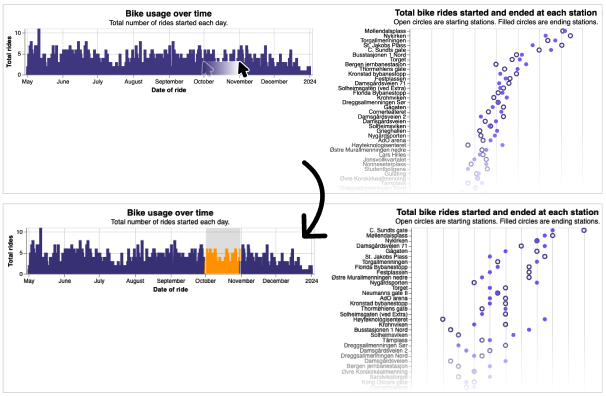

---
# Kilder

**Note:** Denne modulen er delvis basert p친 [Altair User Guide to Interactive Charts](https://altair-viz.github.io/user_guide/interactions.html)

**Datasett som brukes i denne modulen:** 
- Titanic Dataset with Coordinates: https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates
- Bergen Weather Data 2023: https://www.kaggle.com/datasets/amykzhang/bergen-weather-data-2023

---
By Ke Er Zhang and Laura Garrison. 춸 Copyright 2024.